# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [26]:
def harmonic_sum(a, d, N):
    sum = 0

    for i in range(N):
        sum += 1 / (a + i * d)

    return sum


a = 1
d = 1
N = 10
print(harmonic_sum(a, d, N))

2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [27]:
def is_palindrome(n):
    x, y = n, 0
    f = lambda: (y * 10) + x % 10
    while x > 0:
        x, y = x//10 , f()
    return y == n

def check_palindrome(N):
    return is_palindrome(N)

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [28]:
def find_palindromes(N):
    counter = 0
    value = 42
    palindromes = []
    while(counter < N):
        if(is_palindrome(value)):
            palindromes.append(value)
            counter+=1
        value+=1
    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [29]:
from random import randint

def find_median(a, b, c):
    result = 0
    if(a > b):
        if(a > c):
            if(b > c):
                result = b
            else:
                result = c
        else:
            result = a
    else:
        if(b > c):
            if(a > c):
                result = a
            else:
                result = c
        else:
            result = b

    return result

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c))

-69 -67 -2 	Median: -67
66 -96 0 	Median: 0
-64 -10 -28 	Median: -28
86 -82 47 	Median: 47
-89 14 18 	Median: 14
46 86 88 	Median: 86
-9 -54 -13 	Median: -13
-22 8 8 	Median: 8
30 -76 34 	Median: 30
44 -42 -66 	Median: -42


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [30]:
my_array = np.random.normal(10,5,12)

current_sum = np.sum(my_array)

desired_sum = 15

x = desired_sum / current_sum

my_array = my_array * x


print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 15.000000000000002


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [31]:
def calculate_manhattan(a, b):
    c = a - b
    distance = np.linalg.norm(c,1)
    return distance

def calculate_euclidean(a, b):
    c = a - b
    distance = np.linalg.norm(c,2)
    return distance

def calculate_chebyshev(a, b):
    c = a - b
    d = np.array([abs(x) for x in c])
    distance = np.max(d)
    return distance

def calculate_cosine(a, b):
    distance = 1 - (np.transpose(a).dot(b))/(np.linalg.norm(a,2) * np.linalg.norm(b,2))
    return distance

In [32]:
a = np.array([1,3,6,8])
b = np.array([3,2,5,3])
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 9.0
Euclidean distance: 5.5677643628300215
Chebyshev distance: 5
Cosine distance: 0.12381608141462619


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [33]:

def transform(array):
    array -= np.min(array)

    array = array / np.max(array)

    array *= 16
     
    array -= 6

    return array


In [34]:
my_array = np.random.randint(-100,100,42)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -6.0
Max: 10.0
Array:
[-2.91370558  8.94416244 -1.85786802  3.01522843 -5.18781726 -2.18274112
  7.96954315  5.04568528 -5.83756345 10.          1.06598985  8.70050761
 -1.12690355 -0.15228426  4.31472081  3.50253807  9.59390863  3.17766497
 -3.8071066  -1.85786802 -0.55837563  6.34517766 -4.70050761  6.75126904
  5.37055838 -3.64467005 -0.39593909  5.04568528  3.01522843  3.4213198
  7.72588832 10.         -1.85786802  1.39086294 -3.8071066  -6.
  8.45685279  4.96446701 -1.04568528 -2.18274112  9.43147208 -5.6751269 ]


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [35]:
my_array = np.random.randint(-12,4,size=(10,3))
selected_column = np.argmin(my_array.min(axis=0))
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[  2   1  -4]
 [-10  -4  -5]
 [ -1  -7  -3]
 [-12 -12  -3]
 [ -2  -4   1]
 [ -8  -6 -12]
 [ -7  -5 -12]
 [ -9  -7  -7]
 [-10   2   2]
 [ -6  -3  -8]]
Selected column: 0


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [36]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.28619646 0.53037548 0.8305664  0.04179244        nan        nan
 0.05802879        nan 0.41889151 0.19659891]


In [37]:
def replace_missing(arr):
    array_without_missing = np.array(arr)
    median = np.nanmedian(array_without_missing)

    array_without_missing[np.isnan(array_without_missing)] = median

    return array_without_missing

In [38]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.28619646 0.53037548 0.8305664  0.04179244 0.28619646 0.28619646
 0.05802879 0.28619646 0.41889151 0.19659891]


**Answer:** here

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [39]:
def stats_channel(X):
    median = np.median(X, axis=(0,1))
    std = np.std(X,axis=(0,1))
    return np.vstack((median, std))

In [40]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

[[-1.         -2.         -3.        ]
 [ 5.42892759  5.3775549   5.70811678]]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [41]:
def get_unique_values(X):

    # Find unique values along the first axis (rows)
    unique_values = np.unique(X, axis=1)

    return unique_values

In [42]:
X =  np.random.randint(4, 6, size=(2, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[4 4 5]
  [4 5 5]
  [4 5 4]]

 [[4 4 5]
  [5 4 4]
  [4 4 4]]]
Unique :


array([[[4, 4, 5],
        [4, 5, 4],
        [4, 5, 5]],

       [[4, 4, 5],
        [4, 4, 4],
        [5, 4, 4]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [43]:
dataset =  pd.read_csv('titanic.csv')

dataset.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

In [44]:
print(pd.isnull(dataset).any()) # 1

print()

print(dataset['Survived'].mean()) # 2

print()

print(dataset['Sex'].value_counts()) # 3

print()

print(dataset['Embarked'].value_counts(ascending=True).iloc[0]) # 4

print(dataset['Pclass'].value_counts().count()) # 5

print(dataset['Fare'].mean()) # 6 average for all passengers

print(dataset.groupby(['Pclass'])['Fare'].mean()) # average grouped by pclass


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

0.3838383838383838

Sex
male      577
female    314
Name: count, dtype: int64

77
3
32.204207968574636
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


1: Age, Cabin, Embarked

2: 0.38

3: Male

4: 77 

5: 3

6: 32 among all data
84 for 1 class, 20 for 2 and 13 for the last class

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='Sex', ylabel='Age'>

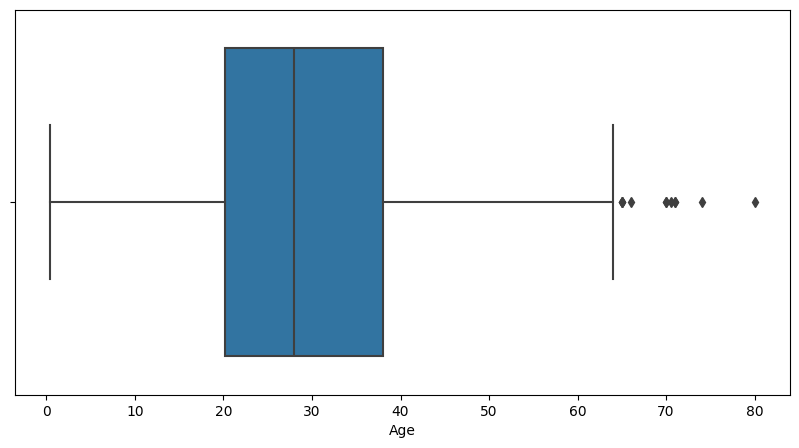

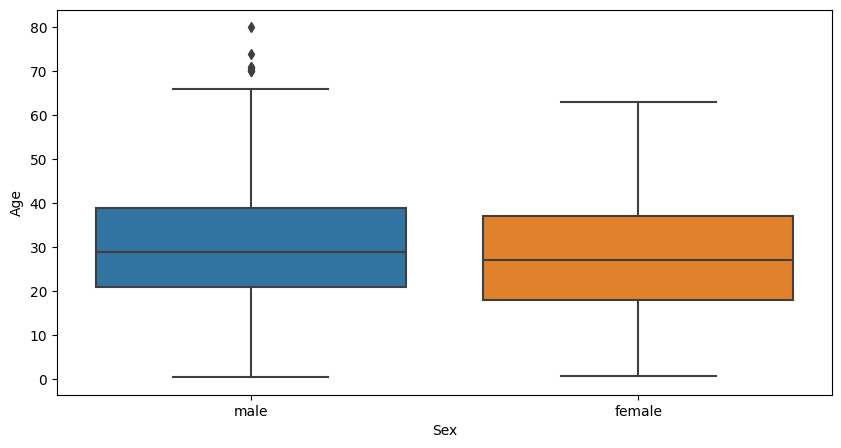

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x = dataset['Age'])

plt.figure(figsize = (10,5)) # Median age is the line in the middle of the box
sns.boxplot(x = dataset['Sex'],y = dataset['Age'])

1: min age is around 2 years and max is around 80 years

Median age is the line in the middle of the box

2: among male median age is 29, among females is 27 

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

In [54]:
# 1

dataset["Name"].str.extract(r' ([A-Za-z]+)\.').value_counts().count() 


17

In [55]:
# 2

dataset["Name"].str.extract(r' ([A-Za-z]+)\.').value_counts() 

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
Name: count, dtype: int64

In [74]:
dataset['Title'] = dataset["Name"].str.extract(r' ([A-Za-z]+)\.')
dataset.groupby(['Sex'])['Title'].value_counts()

# 3
# The most popular male title is Mr and the most popular female is Miss 

Sex     Title   
female  Miss        182
        Mrs         125
        Mlle          2
        Countess      1
        Dr            1
        Ms            1
        Mme           1
        Lady          1
male    Mr          517
        Master       40
        Dr            6
        Rev           6
        Col           2
        Major         2
        Jonkheer      1
        Don           1
        Capt          1
        Sir           1
Name: count, dtype: int64

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

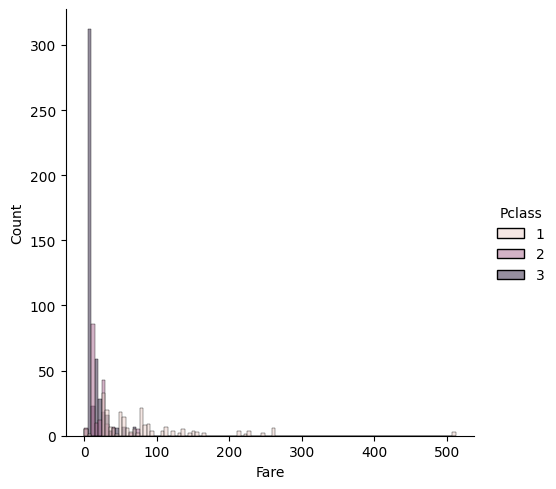

In [46]:
print(dataset.groupby(['Pclass'])['Fare'].mean())

sns.displot(dataset, x = "Fare", hue = "Pclass")

We can see that the third class has the cheapest tickets, and the most expensive ones are in the first class 

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

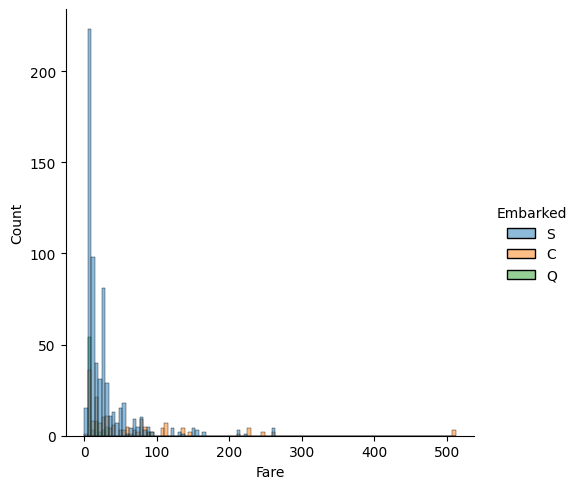

In [47]:
print(dataset.groupby(['Embarked'])['Fare'].mean())


sns.displot(dataset, x = 'Fare',hue = 'Embarked')

Considering results above we can make conclusion that these features also correlate. The most expensive ticketes distributed between classes C and S

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='Survived', ylabel='Age'>

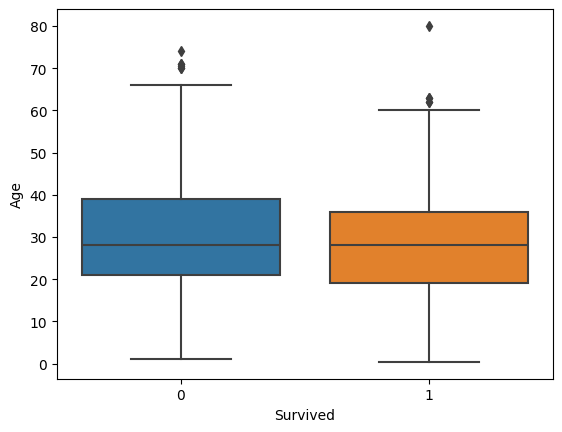

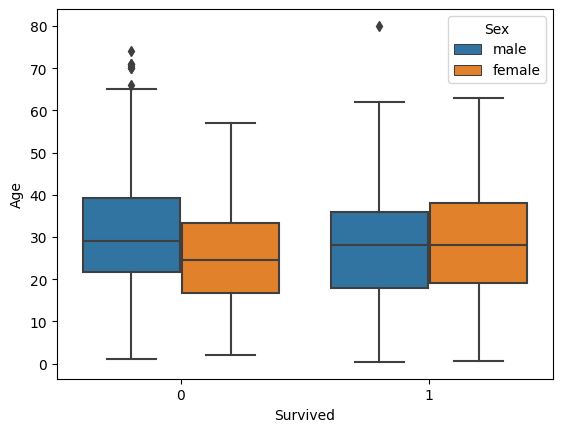

In [48]:
print(dataset.groupby(['Survived'])['Age'].mean())

plt.figure()
sns.boxplot(dataset, x = 'Survived',y = 'Age')

plt.figure()
sns.boxplot(dataset, x = 'Survived',y = 'Age',hue = 'Sex')

Average age of survived people less than who couldnt survive